# Predicting Alcohol Consumption Based On Personality Scores

## Introduction

While not the most dangerous, alcohol is one of the most popular drugs in the world. Its consumption is not only popularized but normalized in modern society, regardless of any negative effects it may have. Many mental factors can affect how often one consumes alcohol. The question we aim to answer in this project is **“How can we predict the frequency of alcohol consumption based on certain aspects of an individual’s personality?”**. The dataset we are using to answer this question is a quantified drug consumption dataset which contains information about 1885 unique individuals. There are 32 columns in total, 12 of which have information about the participant's age, ethnicity, personality measurements, etc. In addition, the dataset contains information regarding these individuals’ use of 19 drugs, ranging from chocolate to heroin, and one fictitious drug (semeron) to filter out false claims. Each value in the drug columns reflects the recency of an individual’s use of a certain drug, ranging from “Never Used” to “Used in Last Day.”

- CL0: Never used
- CL1: Used over a decade ago
- CL2: Used in last decade
- CL3: Used in last year
- CL4: Used in last month
- CL5: Used in last week
- CL6: Used in last day

Since the consumption levels are categorical, we will use the **K-Nearest Neighbors (or **K-NN**) Classification** algorithm for our analysis.

The dataset contains the following 32 columns:

- ID 
- Age (18 to 65+)
- Gender
- Education (education level)
- Country (country of residence)
- Ethnicity (ethnicity)
- Nscore (neuroticism measurement)
    + 12 to 60 (non-quantified)
    + -3.46436 to 3.27393 (quantified)
- Escore (extraversion measurement) 
    + 16 to 59 (non-quantified)
    + -3.27393 to 3.27393 (quantified)
- Oscore (experience measurement)
    + 24 to 60 (non-quantified)
    + -3.27393 to 2.90161 (quantified)
- Ascore (agreeableness measurement)
    + 12 to 60 (non-quantified)
    + -3.46436 to 3.46436 (quantified)
- Cscore (conscientiousness measurement)
    + 17 to 59 (non-quantified)
    + -3.46436 to 3.46436 (quantified)
- IScore (impulsiveness measurement)
    + non-quantified values were not provided
    + -2.55524 to 2.90161 (quantified)
- SS (sensation seeking measurement)
    + non-quantified values were not provided
    + -2.07848 to 1.92173 (quantified)
- Alcohol (alcohol consumption level)
- Amphetamines (amphetamines consumption level)
- AmylNitrate (amyl nitrite consumption level)
- Benzodiazepine (benzodiazepine consumption level)
- Caffeine (caffeine consumption level)
- Cannabis (cannabis consumption level)
- Chocolate (chocolate consumption level)
- Cocaine (cocaine consumption level)
- Crack (crack consumption level)
- Ecstasy (ecstasy consumption level)
- Heroin (heroin consumption level)
- Ketamine (ketamine consumption level)
- LegalHighs (legal highs consumption level) 
- LSD (LSD consumption level)
- Methadone (methadone consumption level) 
- Mushrooms (magic mushrooms consumption level) 
- Nicotine (nicotine consumption level)
- Semeron (fictitious drug Semeron consumption level) 
- VSA (volatile substance abuse level) 

## Methods and Results

### Overview:

In order to perform our analysis, the following steps were taken: 

1. **Reading**: Loading the dataset from the original source on the web
2. **Wrangling and Cleaning:** Assigning relevant names to the unnamed columns, removing irrelevant variables, filtering out over-claiming observations and collapsing classes in `Alcohol`.
2. **Exploratory Data Analysis:** Splitting our data into training and testing sets to perform analysis, computing summary statistics, and visualizing the distribution of potential predictors with the training set.
3. **Choosing Predictors:** Considering predictor distribution and external research to choose the predictors that best fit our analysis.
4. **Building and Tuning the Classifier:** Building and tuning our K-NN classifier using our recipe and 5-fold cross-validation.
5. **Classification:** Re-training our classifier with the most optimal k-value and using it on the testing set to perform our analysis.
6. **Results and Analysis:** Visualizing and analyzing the results. 

### Loading Libraries

In [100]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(forcats)
library(RColorBrewer)
library(ggplot2)
library(knitr)
options(repr.matrix.max.rows = 6) # limits the outputs of data frames to 7 rows (or observations)

### Reading the Data
We read our dataset directly from the URL and saved it to a dataframe called `drugs_data`. Since the columns in the dataset have no headings, we set `col_names` to `FALSE`.

In [101]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
drugs_data <- read_csv(url, col_names = FALSE)
drugs_data

Rows: 1885 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X...
dbl (13): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,⋯,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


### Wrangling and Cleaning
- According to the website containing the dataset, it contains no missing values, and so it is unnecessary to check for them.
- We renamed the columns to names based on the website's column order under "Attribute Information".
- Each row in the dataset corresponds to a single participant (observation), each column to a single variable (attribute) and each cell to a single value. Thus, our dataset is in tidy format.
- Since the purpose of the `Semeron` column is to detect over-claimers, in order to accurately perform our analysis, we filtered out observations that have claimed to ever use it (observations with a value other than `CL0` in the `Semeron` column).
- We removed every variable we deemed unnecessary for our analysis which includes all drugs other than alcohol and semeron, and all attributes apart from personality measurements.
- For simplicity, we collapsed the classes from `CL0` to `CL4` to `low_use` and the classes `CL5` and `CL6` to `high_use`.
- We used `mutate` and `as_factor` to ensure that our response variable, `Alcohol`, is treated as a factor which is necessary for our classificiation model.

In [102]:
# renaming column headers
colnames(drugs_data) <- c("ID", "Age", "Gender", "Education", "Country", "Ethnicity", "NScore", "EScore", "OScore", "AScore", 
                          "CScore", "IScore", "SS", "Alcohol", "Amphetamines", "AmylNitrate", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine",
                          "Crack", "Ecstacy", "Heroin", "LegalHighs", "LSD", "Methadone", "Mushrooms", "Nicotine", "Semeron", "VSA")

# removing unnecessary variables
alcohol_data <- select(drugs_data, NScore , EScore, OScore, AScore,
                                IScore, CScore, SS, Semeron, Alcohol)

# filtering out irrelevant observations
alcohol_data_filtered <- alcohol_data |>
                         filter(Semeron == "CL0") |>
                         select(-Semeron)

# simplifying `Alcohol` classes
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL6"] <- "high_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL5"] <- "high_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL4"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL3"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL2"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL1"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL0"] <- "low_use"

# converting 'Alcohol' to a factor variable
alcohol_clean <- alcohol_data_filtered |>
                 mutate(Alcohol = as_factor(Alcohol))
alcohol_clean

NScore,EScore,OScore,AScore,IScore,CScore,SS,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,0.40148,high_use
-1.32828,1.93886,-0.84732,-0.30172,0.19268,1.63088,-0.52593,high_use
-2.05048,-1.50796,-1.55521,-1.07533,-0.71126,1.13407,-0.52593,high_use
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,1.92173,high_use
2.12700,-0.15487,2.44904,0.94156,-0.21712,-0.65253,0.07987,high_use
-1.19430,1.74091,1.88511,0.76096,0.88113,-1.13788,1.92173,high_use


Table 1.1: Dataset modified for analysis

### Exploratory Data Analysis
After cleaning the dataset, we're left with 428 observations. From this point on, we will be using 75% of our dataset and the other 25% will be set aside for testing our classifier in the final step. We split our dataset into training (75%) and testing (25%) sets using `initial_split()` and set our seed to 69 using `set.seed()` for reproducible results.

In [103]:
set.seed(69)
alcohol_split <- initial_split(alcohol_clean, prop = 0.75, strata = Alcohol)
alcohol_train <- training(alcohol_split)
alcohol_test <- testing(alcohol_split)

#### Dataset Summary
We summarized our dataset in two ways:
- A table reporting the number of observations for each class in `Alcohol`.
- A table reporting the mean of all personality measurements grouped by `Alcohol`.

In [104]:
alcohol_count <- group_by(alcohol_train, Alcohol) |>
                 summarize(n = n())
alcohol_count

Alcohol,n
<fct>,<int>
high_use,204
low_use,116


Table 1.2: Total low_use/high_use 

- Using the `group_by`, `summarize`, and `n()` functions, we obtained the count of observations for both classes in `Alcohol` as shown in Table 1.2.
- From Table 1.2, we can observe an imbalance of observations between the two consumption levels.

In [105]:
alcohol_means <- alcohol_train |>
                 group_by(Alcohol) |>
                 summarize(NScore_Mean = mean(NScore),
                           EScore_Mean = mean(EScore),
                           OScore_Mean = mean(OScore),
                           AScore_Mean = mean(AScore),
                           IScore_Mean = mean(IScore),
                           SS_Mean = mean(SS),
                           CScore_Mean = mean(CScore))
alcohol_means

Alcohol,NScore_Mean,EScore_Mean,OScore_Mean,AScore_Mean,IScore_Mean,SS_Mean,CScore_Mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high_use,-0.1992394,0.14083162,-0.2961758,0.3143100,-0.3016477,-0.4561172,0.3521869
low_use,-0.1861555,-0.08777802,-0.2939090,0.1220522,-0.4236891,-0.4989097,0.1961747


Table 1.3: Mean statistics for potential predictors for each `Alcohol` class

- With the use of `group_by`, `summarize` and `mean()` functions, we obtained the means of all potential predictor variables for both classes in `Alcohol` in Table 1.3.
- A significant difference cannot be observed between the means across the two consumption levels. However, for `EScore` and `AScore`, there is a slight variation.

#### Visual Representation
- We displayed the distribution of the potential predictors using histograms since we are dealing with numerical data.
- We first modified our dataset to compare the distribution of all potential predictors individually using `facet_wrap`. For this, we used `pivot_longer` to have all the potential predictors under one column, `predictors`, and their corresponding values under another column, `values`.

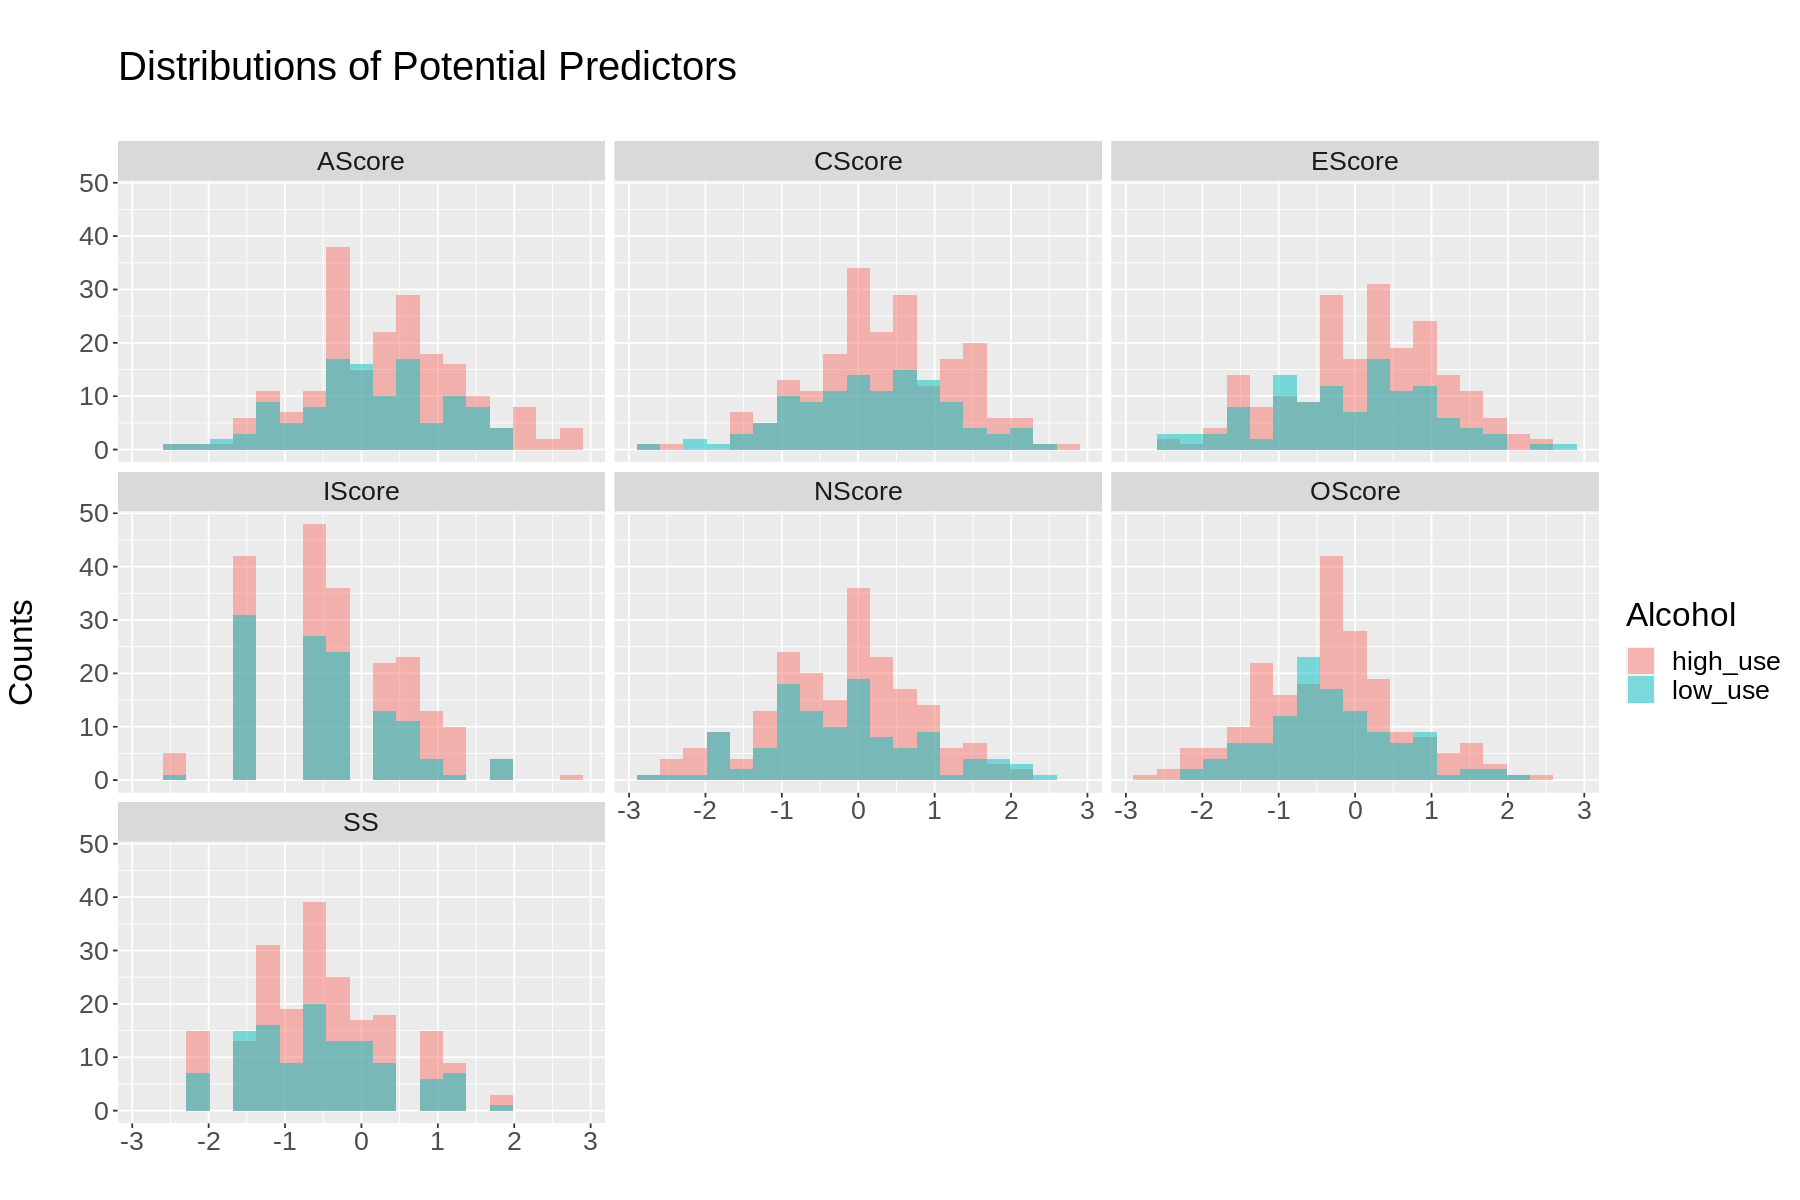

In [106]:
options(repr.plot.width = 15, repr.plot.height = 10)

# modifying the data set 
alcohol_longer <- alcohol_train |> 
                pivot_longer(cols = NScore:SS,
                             names_to = "Potential_predictors",
                             values_to = "Values") 

alcohol_plot <- alcohol_longer |>
    ggplot(aes(x = Values, fill = Alcohol)) + 
    geom_histogram(position = 'identity', bins = 20, alpha = 0.5) +
    labs(x = "",
         y = "Counts\n",
         title = "\nDistributions of Potential Predictors\n") +
    facet_wrap(vars(Potential_predictors)) +
    theme(text = element_text(size = 20)) 
alcohol_plot

Figure 1.1: Distribution plots

- All of the distribution plots in Figure 1.1 are roughly shaped like a bell curve except for the distribution plot for `IScore`, which looks similar to a histogram skewed to the right.
- When we look at the distribution separately for each class in `Alcohol`, there is not a lot of difference as both classes roughly follow the same pattern. The only notable difference that can be observed is that the frequency of observations of `high_use` is higher.

### Choosing Predictors
After the exploratory data analysis, we were unable to find a distinction between the means and the distributions of the variables across the two classes of `Alcohol`. Therefore, we needed further research and analysis to choose our predictors.

We decided to only use three predictors in our algorithm. This is because as the number of predictors increases, there is both a loss in interpretability and an exponential decrease in performance speed. While any three of the seven predictors could have been used, we found that sensation seeking, impulsiveness, and extraversion were the three best. 

- **Sensation seeking** is the tendency to seek complex and intense experiences. Studies have consistently shown that higher sensation seeking is directly associated with binge drinking, and that changes in drinking behaviour are directly paralleled to changes in sensation seeking. In addition, heavy alcohol use has been found to affect sensation seeking, with more active drinking habits leading to higher sensation seeking, and vice versa. This strong, bidirectional relationship causes sensation seeking to be a good predictor for alcohol use.

- **Impulsiveness** is the measure of how often someone tends to do things without thinking. One consequence of this behavior is binge drinking. Not only is drug and alcohol use a consequence of impulsivity, but those who engage in destructive impulsive behavior may turn to alcohol as a result of their negative mental state. It is because of this relationship that we decided to use impulsiveness as one of our predictors.

- **Extraversion**, referring to positive emotions and personality, is the measure of how energetic and sociable someone is. Generally, this trait is understood to be linked to high alcohol consumption. It is believed that extraverts are more sensitive to the effects of alcohol, and gain a greater mood enhancement from consuming it compared to introverts. Furthermore, extraverts enjoy social situations, and so would be more likely to frequent parties and bars. In order to study and examine this relationship, we chose extraversion as a predictor.

### Building the Classifier

1. We defined our predictors and our target variable using `recipe()`. Scaling and centering are implemented within the recipe as well.
2. We built our classification model with `nearest_neighbor()` and set `neighbors = tune()` to find the most optimal k-value.
3. We performed 5-fold cross-validation with k-values ranging from 1 to 50.
4. We created a workflow to combine the recipe and model and apply the `tune_grid()` function for cross-validation. 
5. Lastly, we used `collect_metrics()` to collect the accuracy for each value of k and visually identify our best k-value with a line plot.

In [107]:
set.seed(6699)

# building the recipe
alcohol_recipe <- recipe(Alcohol ~ IScore + SS + EScore, data = alcohol_train) |>
                  step_scale(all_predictors()) |> 
                  step_center(all_predictors())

# tuning the classifier
alcohol_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification")

# performing 5-fold cross validation
alcohol_vfold <- vfold_cv(alcohol_train, v = 5, strata = Alcohol)

# creating a dataframe with k-values
gridvals <- tibble(neighbors = seq(1, 50))

# collecting the results
alcohol_results <- workflow() |> 
    add_recipe(alcohol_recipe) |> 
    add_model(alcohol_spec) |> 
    tune_grid(resamples = alcohol_vfold, grid = gridvals) |> 
    collect_metrics() |> 
    filter(.metric == "accuracy")

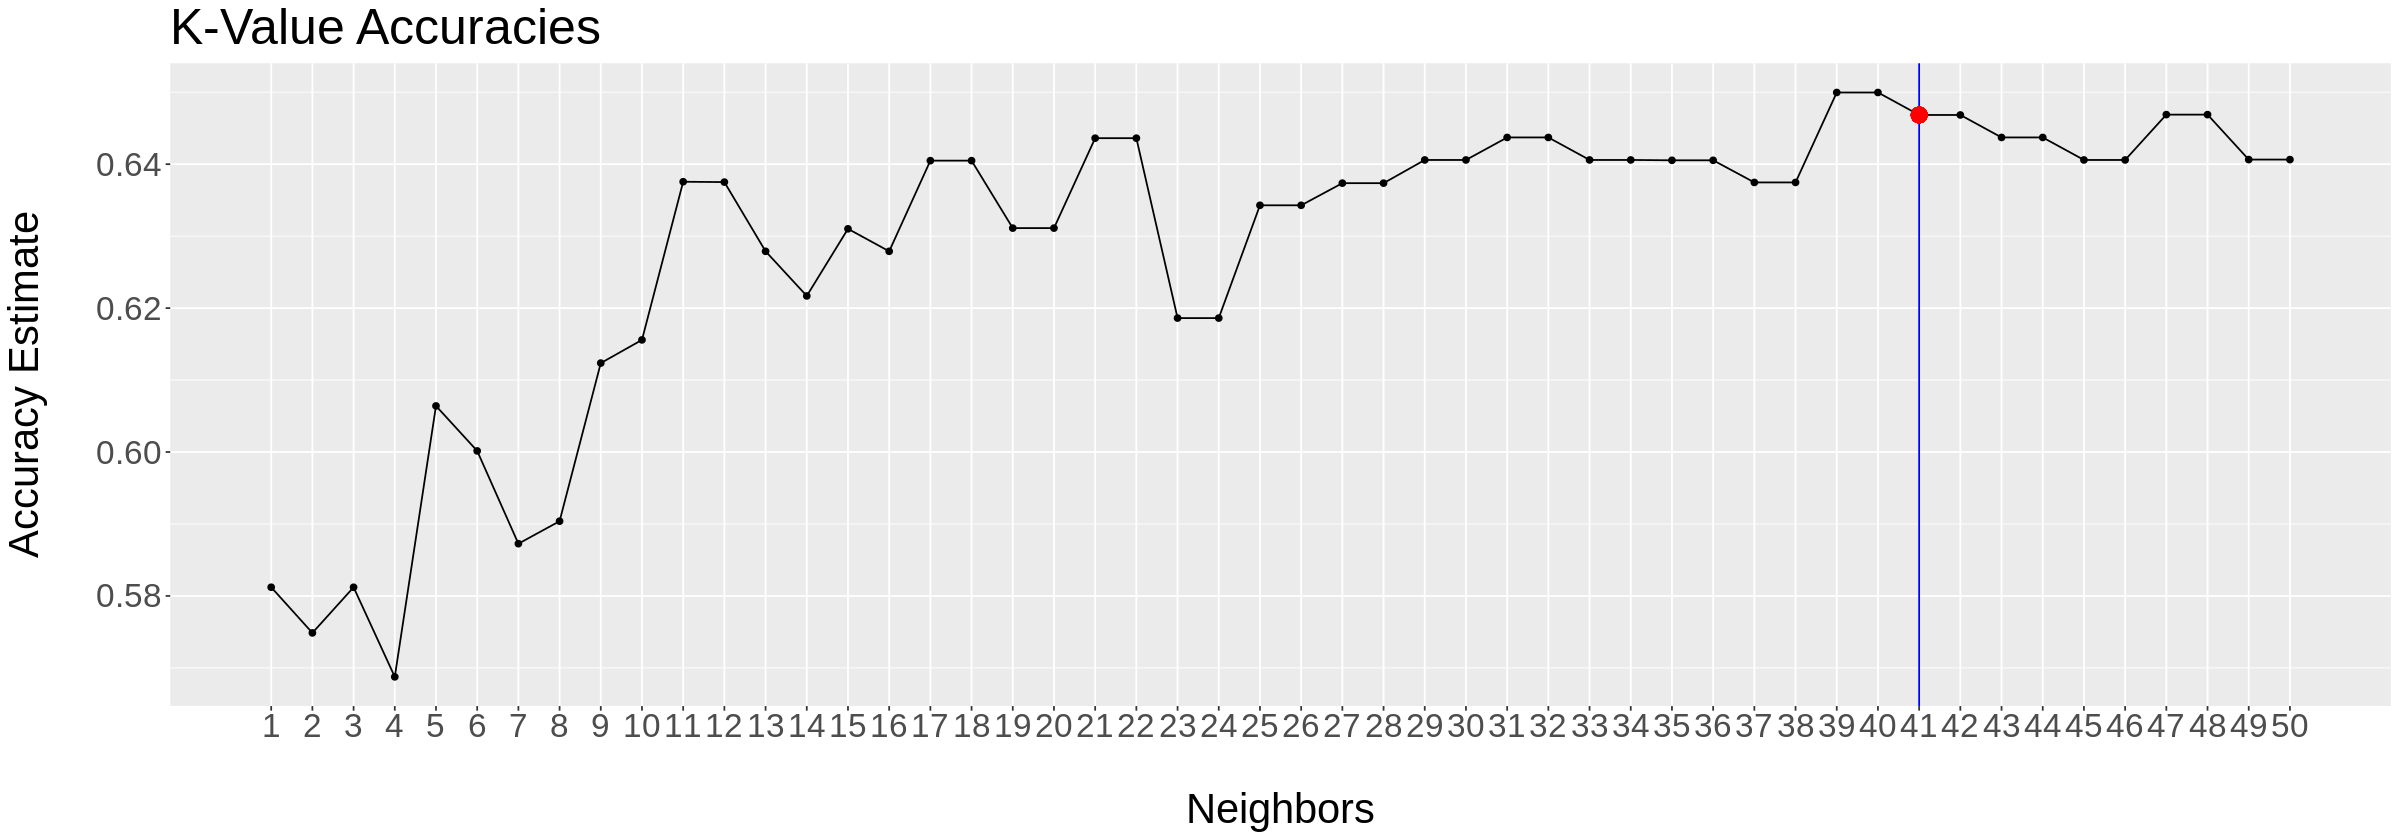

In [108]:
options(repr.plot.width = 20, repr.plot.height = 7)

acc <- alcohol_results |>
         select(neighbors, mean) |>
         filter(neighbors == 41)|>
         pull(mean)

accuracy_plot <- alcohol_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 41, colour = "blue") +
    geom_point(aes(x = 41, y = acc), size = 4, colour = "red") +
    labs(x = "\nNeighbors",
         y = "Accuracy Estimate\n",
         title = "K-Value Accuracies") +
scale_x_continuous(limits = c(1, 50), breaks = seq(1, 50), minor_breaks = seq(1, 50, 1)) +
    theme(text = element_text(size = 25))

accuracy_plot

Figure 1.2: Accuracies for varying values of k-neighbors

### Choosing K

Although, any value of *K* from 25 to 50 would be justified as the accuracies differ by only a small amount. 
- The highest accuracy occurs when the number of neighbors is 39 and 40, neither of them are ideal values of k.
- Looking at Figure 1.2, the accuracy below 39 varies significantly.
- Since the K-NN classification algorithm is based on majority votes and we are predicting between two classes, a k-value of 40 could lead to a tie.
- Therefore, we chose the next best value, i.e., **41**.

In [109]:
set.seed(1)

knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 41) |> 
                 set_engine("kknn") |> 
                 set_mode("classification")

alcohol_fit <- workflow() |>
               add_recipe(alcohol_recipe) |>
               add_model(knn_best_spec) |>
               fit(data = alcohol_train)

### K-NN Classification

We then re-trained our classification model with the chosen k-value, used it to predict the `Alcohol` classes in the testing set `alcohol_test`, and checked the accuracy of our classifier.

In [110]:
set.seed(1)

# predicting the results
alcohol_predictions <- predict(alcohol_fit, alcohol_test) |> 
                       bind_cols(alcohol_test)

# checking the accuracy
alcohol_acc <- alcohol_predictions |> 
               metrics(truth = Alcohol, estimate = .pred_class) |> 
               select(.metric, .estimate) |> 
               head(1)

alcohol_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.6203704


Table 1.4: Prediction accuracy of the classifier

### Summarizing the Results

From Table 1.4, we can see that the accuracy of our classification model turned out to be 62.04%. To get a better idea of how the classification model performed, we built a confusion matrix.

In [111]:
set.seed(1)

# building the confusion matrix
alcohol_cm <- alcohol_predictions |>
              conf_mat(truth = Alcohol, estimate = .pred_class)

alcohol_cm

          Truth
Prediction high_use low_use
  high_use       67      39
  low_use         2       0

Table 1.5: Confusion matrix

From the information in Table 1.5, it looks like our classifier labeled most of the observations `high_use` regardless of their true value.

### Visualizing the Results

We created a bar plot representing the data in the confusion matrix.

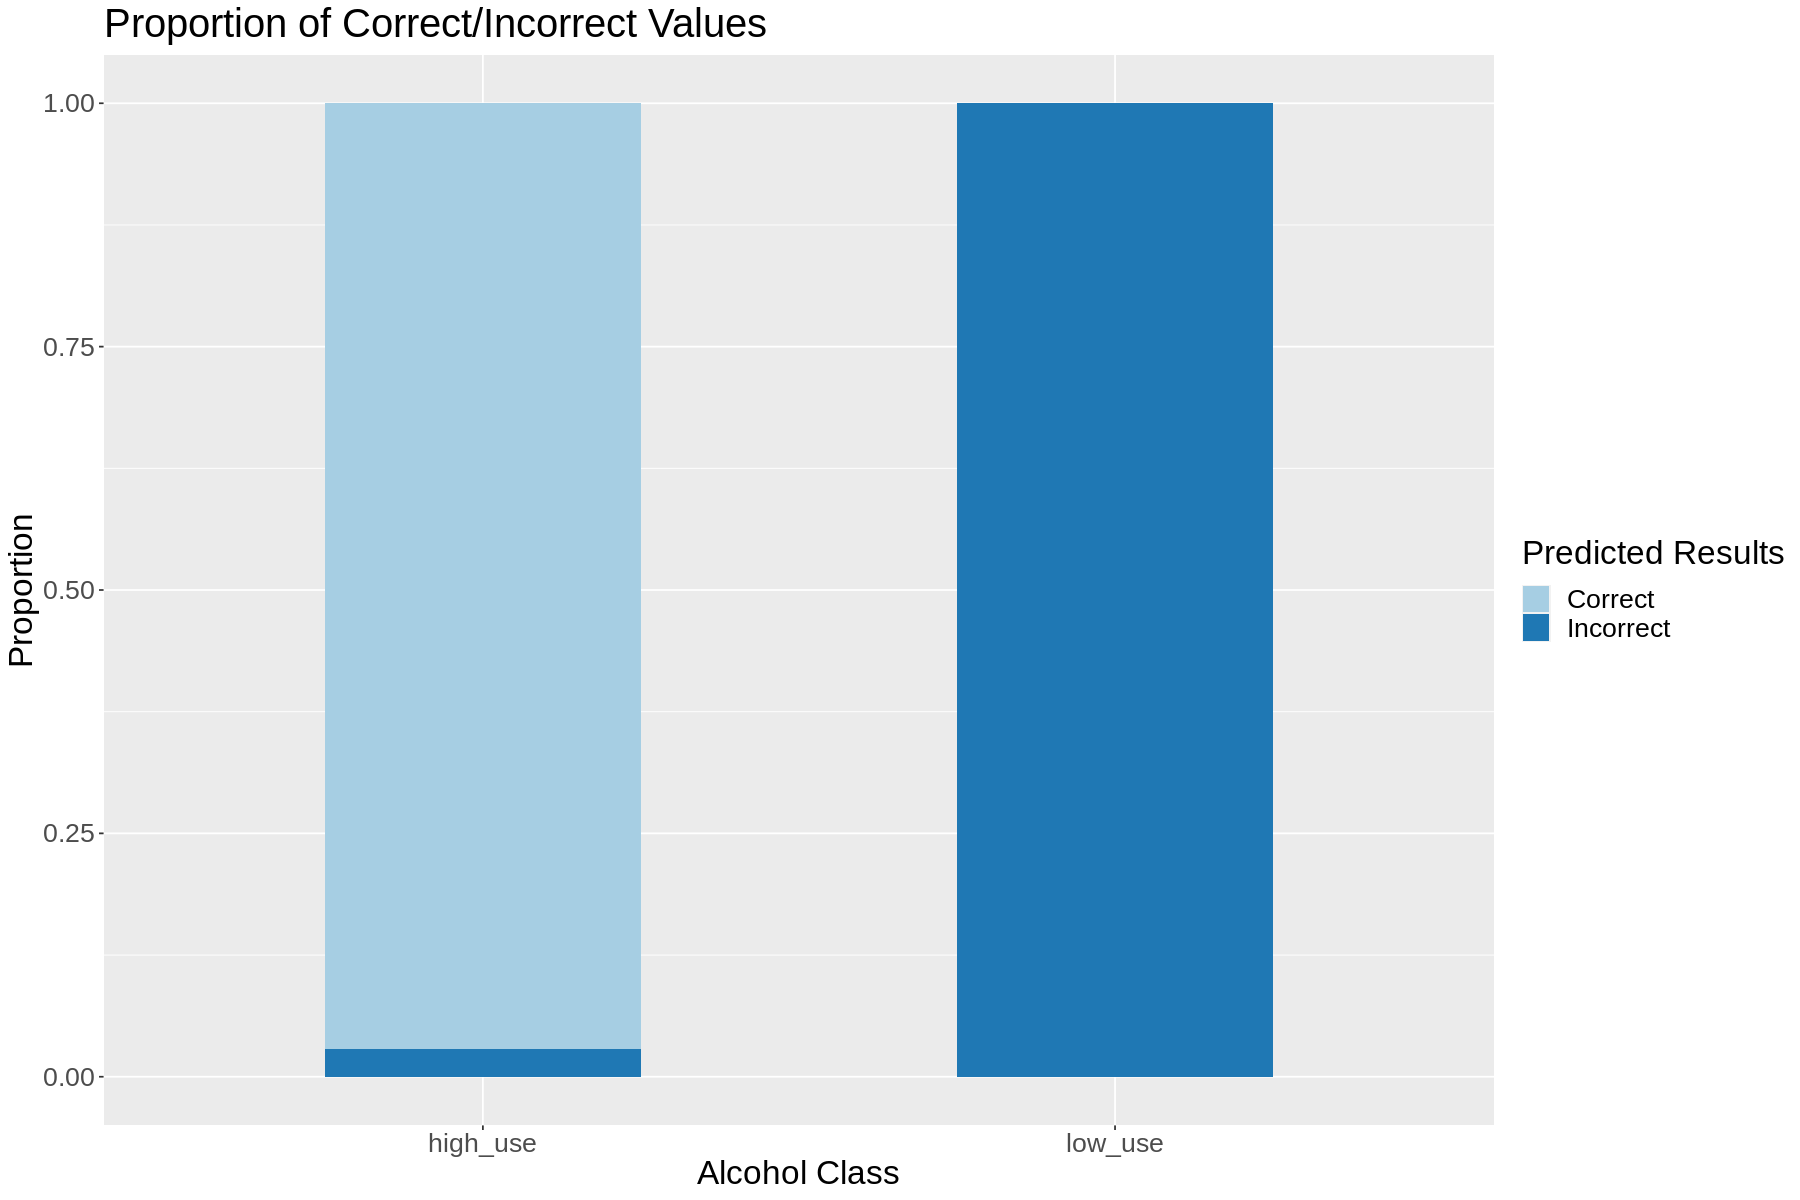

In [112]:
set.seed(1)

# creating a table to find out the proportion of correct/incorrect predictions
confusion_table <- alcohol_cm$table |>
                   as_tibble() |>
                   mutate(
                       correct_prediction = case_when(
                           Prediction == Truth ~ "Correct",
                           TRUE ~ "Incorrect"
                           )
                   )

options(repr.plot.width = 15, repr.plot.height = 10)

# bar plot for the proportion of correct/incorrect predictions
ggplot(confusion_table, aes(x = Truth, y = n, fill = correct_prediction)) +
    geom_bar(stat = "identity", width = 0.5, position = "fill") +
    labs(x = "Alcohol Class", y = "Proportion",
         title = "Proportion of Correct/Incorrect Values", 
         fill = "Predicted Results") +
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = "Paired")


Figure 1.3: Proportion of correct/incorrect predictions

From figure 1.3, we can conclude that nearly all of the values of `high_use` were predicted correctly whereas all the values of `low_use` were predicted incorrectly.

## Discussion:

An accuracy of 62.04% for a classifier is too low to reliably produce results. As is shown by Figure 1.3 and Table 1.5, the algorithm predicted nearly every observation to be a `high_use` observation. Out of the 108 observations it predicted, only two of them were thought to be `low_use`, and yet they were both `high_use`. One source of this error is the imbalance in class quantity. In the training data, there were nearly 100 more observations with the `high_use` class than the `low_use` class. This issue stems from the dataset itself. Furthermore, out of the 108 observations in the testing set, 64% of them belonged to the `high_use` class. This means that a classifier that predicts `high_use` every time would have an accuracy higher than ours. 

##### There are a number of possible explanations for the low accuracy of our classifier.

1. While the original dataset was extensive, we had to filter out over three quarters of the observations due their being over-claimants. Because we were only left with 428 observations after the filtering, the resulting algorithm is much less accurate than had it had access to more data.

2. An overwhelming majority of the observations had a consumption level of `high_use` for alcohol. This can be explained due to the drug's popularity, but also caused the algorithm to overpredict `high_use` in the testing set.

3. The three predictors we chose have a strong positive relationship with alcohol consumption. Had we chosen a balanced number of positive and negatively related personality traits, it is possible that the algorithm would have behaved differently.

4. Our dataset is ordinal. The K-NN algorithm doesn't work very well with ordered dataset, as instead of treating two different classes as two different levels of consumption, it treats them the same.

5. It is possible that the predictors we chose weren't as strong is we initially thought, or were simply not good at predicting alcohol consumption. While we did thorough research to reach our conclusions, it might be the case that the dataset doesn't align with our findings, as can be shown by the distributions in Figure 1.1. 

Unfortunately, these were not the results we expected to find. Throughout our research, we consistently found that all seven of the available predictors had a notable relationship with alcoholism. Thus, we expected a classification accuracy of at least 80%. We expected to find a clear trend between the three predictors we chose, and that the classifier would be able to reliably predict whether or not an individual was at risk of heavy alcohol consumption according to their personality. What we found was that in our dataset, the predictors did not, in fact, have a notable relationship with alcohol consumption, resulting in a very weak classifier.

### Further Implications:

We don't believe our findings to have a significant impact. Because there are numerous research papers conducted by professionals in the field that support our original assumption surrounding our predictors, we still believe that these personality traits are related to alcohol consumption. Instead, the impact of our findings is that the dataset we chose is not very good, and generally should not be used in a research capacity, at least in relation to alcohol. Nearly three quarters of the observations are invalid, and the dataset doesn't contain sufficient data representing individuals with limited alcohol consumption. While it could be argued that this is reflective of alcohol's popularity, it makes the dataset insufficient for our purpose

##### Our findings do, however, raise a number of future questions:

- Besides personality traits, what other factors can affect an individual's alcohol use? If we used them as predictors, would our classifier had been more accurate?
- How do personality traits affect the use of other drugs?
- How does alcohol use affect one's personality traits?

## Sources:

#### References:
Bø, R., Billieux, J., & Landrø, N. I. (2016). Which facets of impulsivity predict binge drinking? Addictive Behaviors Reports, 3, 43–47. https://doi.org/10.1016/j.abrep.2016.03.001 

Papachristou, H., Nederkoorn, C., & Jansen, A. (2016). Neuroticism and negative urgency in problematic alcohol use: A pilot study. Substance Use & Misuse, 51(11), 1529–1533. https://doi.org/10.1080/10826084.2016.1178294 

Fairbairn, C. E., Sayette, M. A., Wright, A. G., Levine, J. M., Cohn, J. F., & Creswell, K. G. (2015). Extraversion and the rewarding effects of alcohol in a social context. Journal of Abnormal Psychology, 124(3), 660–673. https://doi.org/10.1037/abn0000024 

Gmel, G., Marmet, S., Studer, J., & Wicki, M. (2020). Are changes in personality traits and alcohol use associated? A cohort study among young Swiss men. Frontiers in Psychiatry, 11. https://doi.org/10.3389/fpsyt.2020.591003 

#### Relevant Literature:

**Personality Traits and Drug Consumption:** Fehrman, E. (2019). Personality traits and drug consumption. Springer International Publishing. 

**The Five and Seven Factors Personality Models:** Aluja, A., & Blanch, A. (2011). The five and seven factors personality models: Differences and similitude between the TCI-R, NEO-FFI-R and ZKPQ-50-CC. The Spanish Journal of Psychology, 14(2), 659–666. https://doi.org/10.5209/rev_sjop.2011.v14.n2.14 

#### Dataset

Fehrman, E., Egan, V., &amp; Mirkes, E. M. (2016, October 17). Drug consumption (quantified) Data Set. UCI Machine Learning Repository: Drug Consumption (quantified) data set. Retrieved October 18, 2022, from https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29 